In [310]:
# Assignment 1
# Exploratory Data Analysis on Haberman Cancer survival dataset
# OBJECTIVE : To classify whether the patient survives his/her battle against cancer or not

In [311]:
#Importing the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Importing the dataset
hm=pd.read_csv('Haberman.csv',header=None)

In [312]:
#Lets name the columns in the dataset to understand the data better
hm=hm.rename(index=str,columns={0:'patient_age',1:'operation_year',2:'number_nodes',3:'survival_result'})

In [313]:
#Lets look at the data
#Start of the data
hm.head()

,patient_age,operation_year,number_nodes,survival_result
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [314]:
#End of the data
hm.tail()

,patient_age,operation_year,number_nodes,survival_result
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [315]:
# High level statistics of the dataset
#Number of data points
# Data point = 306 and Num of Features =4
hm.shape

(306, 4)

In [316]:
#Look at columns/features (A quick glance)
hm.columns

Index(['patient_age', 'operation_year', 'number_nodes', 'survival_result'], dtype='object')

In [317]:
# Number of classes
# Therefore number of classes is two
hm['survival_result'].unique()

array([1, 2], dtype=int64)

In [318]:
#Number of data-points per class
# 225 samples of surviviors
# 81 samples of non survivors
hm['survival_result'].value_counts()

1    225
2     81
Name: survival_result, dtype: int64

In [319]:
# OBJECTIVE : To classify whether the patient survives his/her battle against cancer or not
# 1) To understand the data set and its trend 
# 2) Perform univariate analysis to find out single most important feature
# 3) Perform Bi-variate analysis to find out pair of important features 

In [320]:
# Multivariate analysis
# We perform multivariate analysis before univariate analysis to get an idea about which two features perform the best
# and to perform univariate analysis on those two or atleast one of those.

In [321]:
# Splitting the data based on the label
# Here we use loc instead of iloc as the labels/class are not in an order 
survivors= hm.loc[hm['survival_result']== 1];
non_survivors= hm.loc[hm['survival_result']== 2];
#print(suvivors)
#print(non_survivors)

In [324]:
survivors.describe()

,patient_age,operation_year,number_nodes,survival_result
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [323]:
non_survivors.describe()

,patient_age,operation_year,number_nodes,survival_result
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


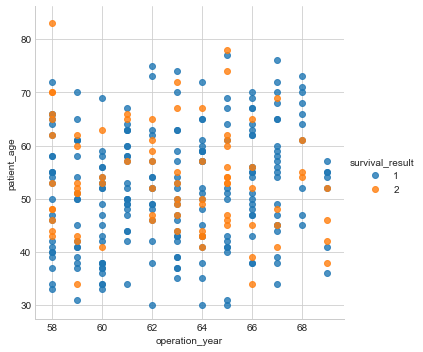

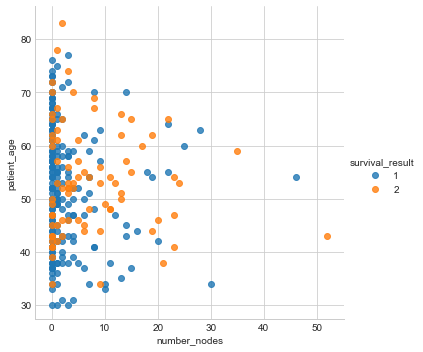

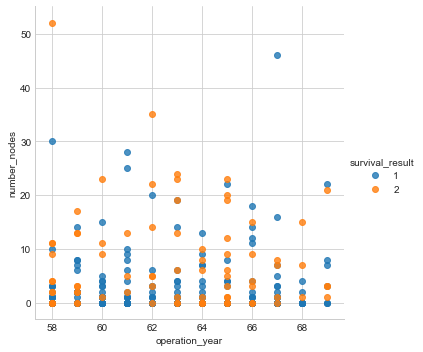

In [325]:
# Scatter Plot (For all the possible combinations) -2D
# lmplot is a combination of regplot and Facegrid plot features and makes plotting more easy

sns.set_style('whitegrid');
sns.lmplot(x="operation_year", y="patient_age",data= hm,hue="survival_result", fit_reg=False,legend=True, legend_out=True)
plt.show()

sns.set_style('whitegrid');
sns.lmplot(x="number_nodes", y="patient_age",data= hm,hue="survival_result", fit_reg=False,legend=True, legend_out=True)
plt.show()

sns.set_style('whitegrid');
sns.lmplot(x="operation_year", y="number_nodes",data= hm,hue="survival_result", fit_reg=False,legend=True,legend_out=True)
plt.show()

In [326]:
# Conclusions : 
# Data is not linearly seperable looking at the scatter plots
# From above graphs ,I could observe that people between the age of group of 30 to 40 have more survivors as compared to the 
# non- survivors

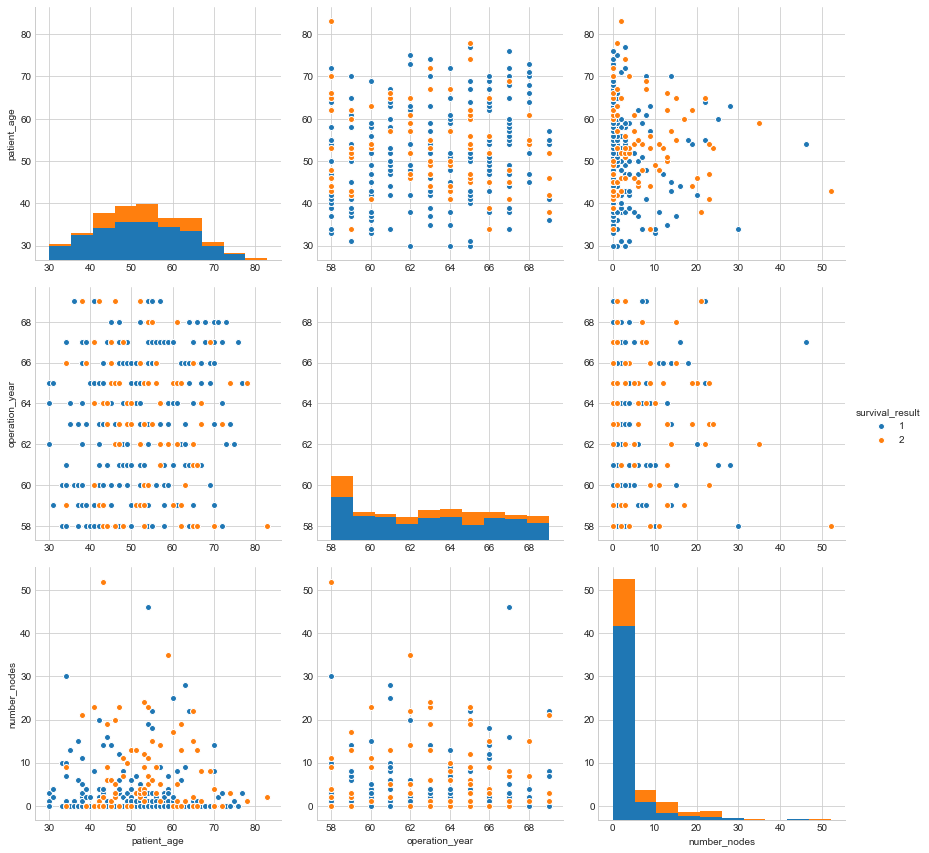

In [327]:
# Pair plots analysis
sns.set_style('whitegrid');
sns.pairplot(hm,hue='survival_result',size=4,vars=['patient_age','operation_year','number_nodes'])
plt.show()

In [328]:
#Observations:
# Basically we can conclude the same thing that ,since the data is not linearly seperable , different datapoints are overlapping
# Between the age group of 30 to 40 , most number of patients survive the fight against cancer as compared to those who do not 
# survive

In [329]:
#Univariate Analysis
# Since there were some positive observations in relation to the age , lets consider age feaure first 

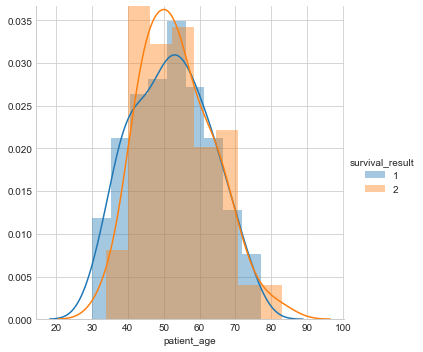

In [330]:
#Plotting a histogram
sns.FacetGrid(hm,hue='survival_result',size=5)\
    .map(sns.distplot,'patient_age')\
    .add_legend()
plt.show()

In [331]:
# OBSERVATIONS:
# Clearly we can observe, that the survivors are more between age group of 30 to 40 when compared to those that did not survive
# Between age group of 40 to 50 , more non-survivors as compared to the survivors

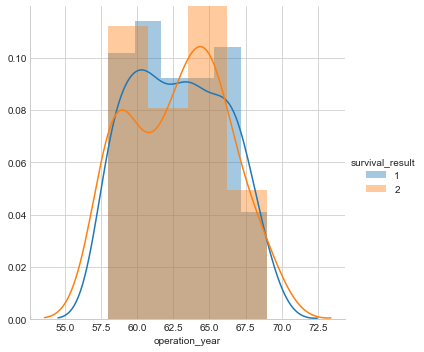

In [332]:
sns.FacetGrid(hm,hue='survival_result',size=5)\
    .map(sns.distplot,'operation_year')\
    .add_legend()
plt.show()

In [333]:
# OBSERVATION:
# Cannot conclude much from the above , since the pdf are overlapping for most of the part

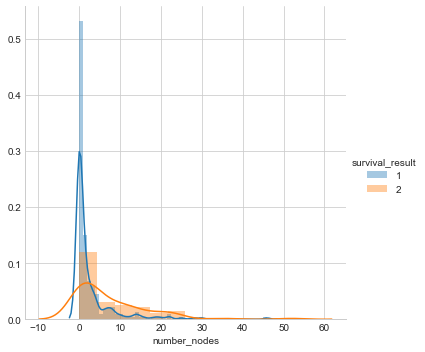

In [334]:
sns.FacetGrid(hm,hue='survival_result',size=5)\
    .map(sns.distplot,'number_nodes')\
    .add_legend()
plt.show() 

In [335]:
#Observations:
# As we saw from multivariate analysis as well as scatter plot ,similarly we cannot conclude much from the pdf and histograms 
# Here we can observe for number of nodes between 0 to 3 , the survival is more (almost 55%) and as the number of nodes increases, the
# chances of survival decreases.

In [336]:
# CDF Plotting (CDF & PDF)
counts,bin_edges=np.histogram(survivors['patient_age'],bins=20,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='survivor-cdf')
plt.legend()

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


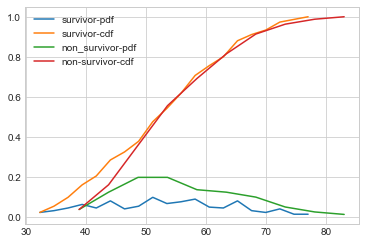

In [337]:
counts,bin_edges=np.histogram(non_survivors['patient_age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='non_survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='non-survivor-cdf')
plt.legend()
plt.show()

In [338]:
# OBSERVATIONS:
# For the most part of it, cdf for survivors as well as non survivors overlaps 
# between age group of 30 to 48 , more number of survivors as compared to non survivors

In [339]:
counts,bin_edges=np.histogram(survivors['operation_year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='survivor-cdf')
plt.legend()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


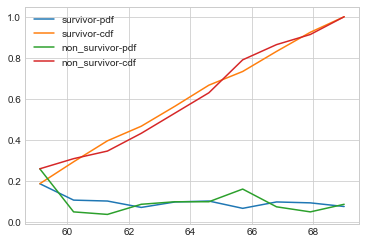

In [340]:
counts,bin_edges=np.histogram(non_survivors['operation_year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='non_survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='non_survivor-cdf')
plt.legend()
plt.show()

In [341]:
#OBSERVATION:
# Cannot come to any conclusion looking at the cdf of survivors and non survivors in terms of years
# Not an useful feature

In [342]:
counts,bin_edges=np.histogram(survivors['number_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='survivor-cdf')
plt.legend()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


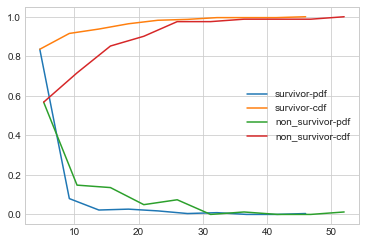

In [343]:
counts,bin_edges=np.histogram(non_survivors['number_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='non_survivor-pdf')
plt.plot(bin_edges[1:],cdf,label='non_survivor-cdf')
plt.legend()
plt.show()

In [344]:
# OBSERVATION:
# for nodes between 0 to 25, the number of survivors is more than number of non-survivors and afterwards they almost overlap

In [345]:
# Mean  and standard deviation
# Mean
print('Mean:')

print(np.mean(survivors['patient_age']))
print(np.mean(non_survivors['patient_age']))

print(np.mean(survivors['number_nodes']))
print(np.mean(non_survivors['number_nodes']))

# Standard Deviation
print('\nSD:')

print(np.std(survivors['patient_age']))
print(np.std(non_survivors['patient_age']))

print(np.std(survivors['number_nodes']))
print(np.std(non_survivors['number_nodes']))


Mean:
52.01777777777778
53.67901234567901
2.7911111111111113
7.45679012345679

SD:
10.98765547510051
10.10418219303131
5.857258449412131
9.128776076761632


In [346]:
#OBSERVATIONS:
# Here we can observe that the mean number of nodes is very much less for survivors as compared to the non-survivors

In [347]:
#Median, percentile,Quantile,Median Absolute Deviation
print('Median:')

print(np.median(survivors['patient_age']))
print(np.median(non_survivors['patient_age']))

print(np.median(survivors['number_nodes']))
print(np.median(non_survivors['number_nodes']))
#####################################################################
print('\npercentile:')

print(np.percentile(survivors['patient_age'],95))
print(np.percentile(non_survivors['patient_age'],95))

print(np.percentile(survivors['number_nodes'],95))
print(np.percentile(non_survivors['number_nodes'],95))
#######################################################################
print('\nQuantile:')

print(np.percentile(survivors['patient_age'],np.arange(0,100,25)))
print(np.percentile(non_survivors['patient_age'],np.arange(0,100,25)))


print(np.percentile(survivors['number_nodes'],np.arange(0,100,25)))
print(np.percentile(non_survivors['number_nodes'],np.arange(0,100,25)))
#########################################################################
from statsmodels import robust
print('\nMAD:')

print(robust.mad(survivors['patient_age']))
print(robust.mad(non_survivors['patient_age']))

print(robust.mad(survivors['number_nodes']))
print(robust.mad(non_survivors['number_nodes']))

Median:
52.0
53.0
0.0
4.0

percentile:
70.0
70.0
14.0
23.0

Quantile:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

MAD:
13.343419966550417
11.860817748044816
0.0
5.930408874022408


In [ ]:
#OBSERVATIONS:
# Here we can observe that median of number of nodes is less for survivors as compared to non-survivors
# Also you can see the median of number of nodes is zero and in case of mean was 2.79, infering that mean is getting effected by
# the outlier cases

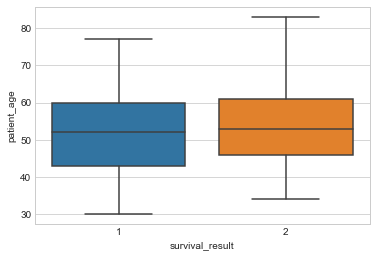

In [348]:
#BoxPlots-Age
sns.boxplot(x='survival_result',y='patient_age',data=hm)
plt.show()

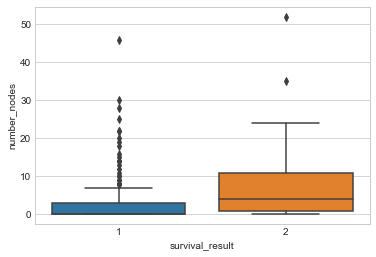

In [349]:
#BoxPlots-Nodes
sns.boxplot(x='survival_result',y='number_nodes',data=hm)
plt.show()

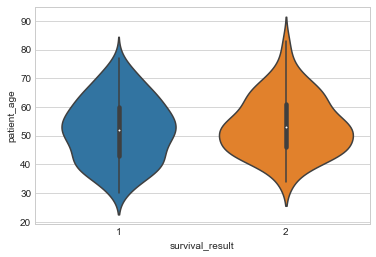

In [350]:
#Violin plots
sns.violinplot(x='survival_result',y='patient_age',data=hm)
plt.show()

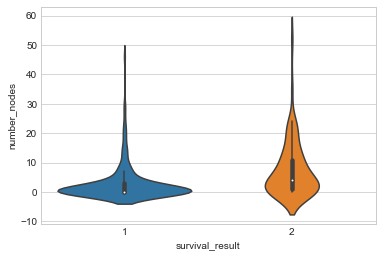

In [351]:
sns.violinplot(x='survival_result',y='number_nodes',data=hm)
plt.show()

In [352]:
# Final Observations : Data is not linearly Seperable
# 1) Operation_Year as a feature does not give any information and can be ignored because there is not much trend that we can 
#    observe 
# 2) Age as a feature showed one trend in a particular, age group between 30 to 40 had more number of survivors as compared to 
#    non-survivors
# 3) Nodes could be considered the most important feature out of all the features, and number of nodes equivalent to 0 to 3
#    had most numbers of survivors